In [1]:
cd ..

/data/store01/data_dirs/students/ucfafyi/Sentinel


In [2]:
import sys
sys.path.insert(0,'python')
from fastRWpkl import *
import scipy.stats
%matplotlib inline 

In [58]:
b4_modis = parallel_rw_pkl(None, 'b4_modis', 'r')
b2_modis = parallel_rw_pkl(None, 'b2_modis', 'r')
b3_modis = parallel_rw_pkl(None, 'b3_modis', 'r')
b8_modis = parallel_rw_pkl(None, 'b8_modis', 'r')
b8a_modis = parallel_rw_pkl(None, 'b8a_modis', 'r')
b11_modis = parallel_rw_pkl(None, 'b11_modis', 'r')
b12_modis = parallel_rw_pkl(None, 'b12_modis', 'r')

In [59]:
bands = []
for j in [b2_modis,b3_modis,b4_modis,b8_modis,b8a_modis,b11_modis,b12_modis]:
    data = []
    for i in j:
        data+=i
    bands.append(data)

In [67]:
names = ('b2_modis,b3_modis,b4_modis,b8_modis,b8a_modis,b11_modis,b12_modis').split(',')

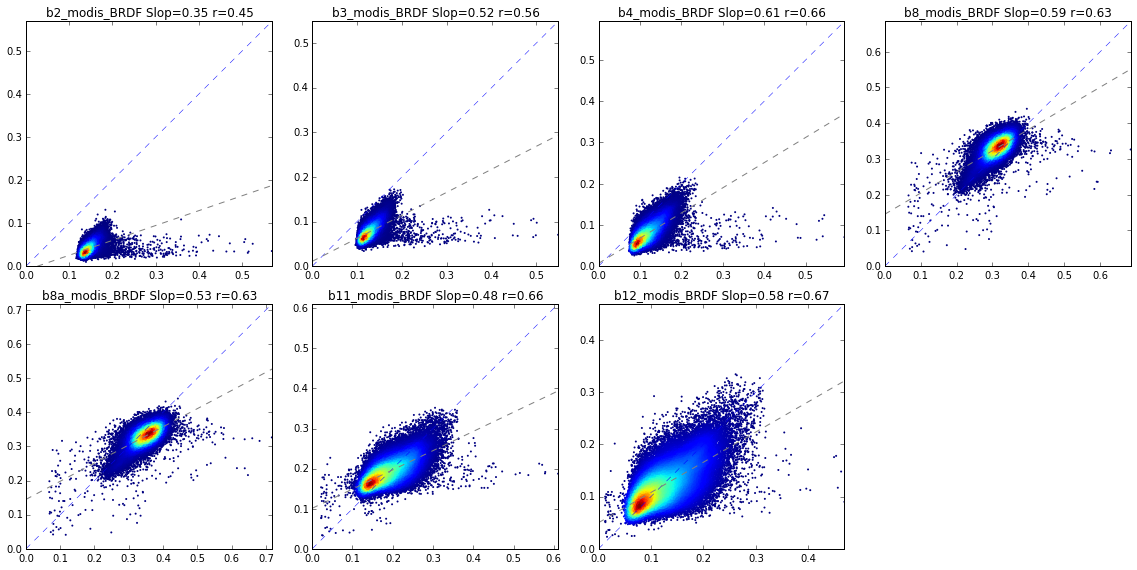

In [68]:
import pylab as plt
import matplotlib.gridspec as gridspec
from scipy.stats import gaussian_kde
fig = plt.figure

gs = gridspec.GridSpec(2,4)  # generate a grid space
fig = plt.figure(figsize=(16,8))

for i in range(7):
    ax = fig.add_subplot(gs[i])
    
    data = np.array(bands[i])
    maxval = np.nanmax(data)
    m = data[:,0][~np.isnan(data[:,1])]
    s = data[:,1][~np.isnan(data[:,1])]

    r = scipy.stats.linregress(m,s) # all of the data composed of mean value and brdf
    fit = np.polyfit(m,s,1)
    fit_fn = np.poly1d(fit)
    #plt.figure(figsize = (7,7))
    xy = np.vstack([m,s])
    z = gaussian_kde(xy)(xy)
    ax.scatter(m,s, c=z, s=4, edgecolor='')
    ax.plot([0,1],[0.,1], '--',linewidth=0.5)
    ax.plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
    ax.set_xlim(0, maxval)
    ax.set_ylim(0, maxval)
    ax.set_title('%s_BRDF'%names[i]+' Slop=%.2f'%r.slope+' r=%.2f'%r.rvalue)
plt.tight_layout()

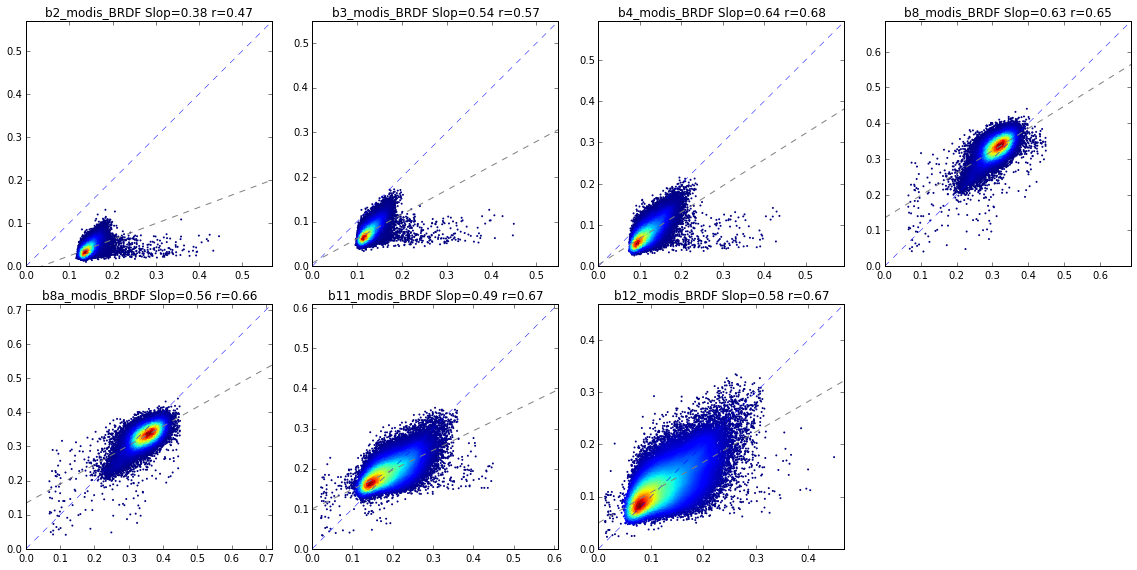

In [70]:
import pylab as plt
import matplotlib.gridspec as gridspec
from scipy.stats import gaussian_kde
fig = plt.figure

gs = gridspec.GridSpec(2,4)  # generate a grid space
fig = plt.figure(figsize=(16,8))

for i in range(7):
    ax = fig.add_subplot(gs[i])
    
    data = np.array(bands[i])
    maxval = np.nanmax(data)
    m = data[:,0][~(np.isnan(data[:,1])|(data[:,0]>0.45))]
    s = data[:,1][~(np.isnan(data[:,1])|(data[:,0]>0.45))]

    r = scipy.stats.linregress(m,s) # all of the data composed of mean value and brdf
    fit = np.polyfit(m,s,1)
    fit_fn = np.poly1d(fit)
    #plt.figure(figsize = (7,7))
    xy = np.vstack([m,s])
    z = gaussian_kde(xy)(xy)
    ax.scatter(m,s, c=z, s=4, edgecolor='')
    ax.plot([0,1],[0.,1], '--',linewidth=0.5)
    ax.plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
    ax.set_xlim(0, maxval)
    ax.set_ylim(0, maxval)
    ax.set_title('%s_BRDF'%names[i]+' Slop=%.2f'%r.slope+' r=%.2f'%r.rvalue)
plt.tight_layout()

(0, 0.18564935636269228)

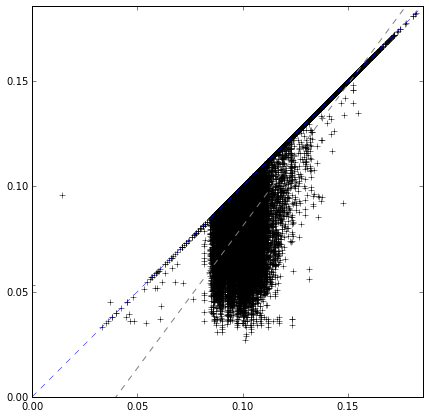

In [14]:
import pylab as plt
plt.figure(figsize = (7,7))
maxval = np.nanmax(shift)
r = scipy.stats.linregress(shift[:,1],shift[:,0])

fit = np.polyfit(shift[:,1],shift[:,0],1)
fit_fn = np.poly1d(fit)
#plt.figure(figsize = (7,7))
plt.plot(shift[:,1],shift[:,0], 'k+')
plt.plot([0,1],[0.,1], '--',linewidth=0.5)
plt.plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
plt.xlim(0, maxval)
plt.ylim(0, maxval)

See from the upper results shows two kind of distribution, one is near the standard line, one is away from thatl line. Thus, a way to separate this two different distribution is conducted and the results showed bellow.

In [2]:
optimalx = parallel_rw_pkl(None, 'optimalx', 'r')
x_costu = parallel_rw_pkl(None, 'x_costu', 'r')
x_cost_sft= parallel_rw_pkl(None, 'x_cost_sft', 'r')

<matplotlib.colorbar.Colorbar instance at 0x7f2ae67fd0e0>

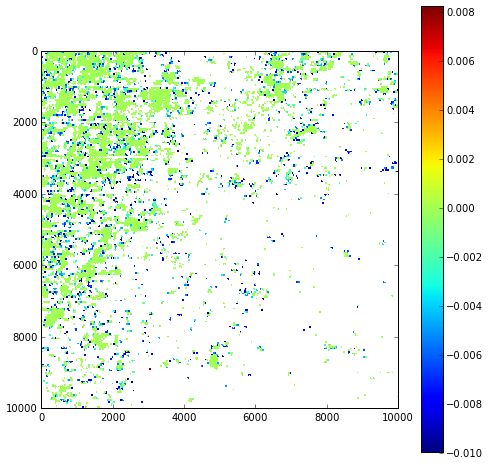

In [23]:
import pylab as plt
plt.figure(figsize=(8,8))
plt.imshow(x_costu-x_cost_sft)
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7f8418dd48c0>

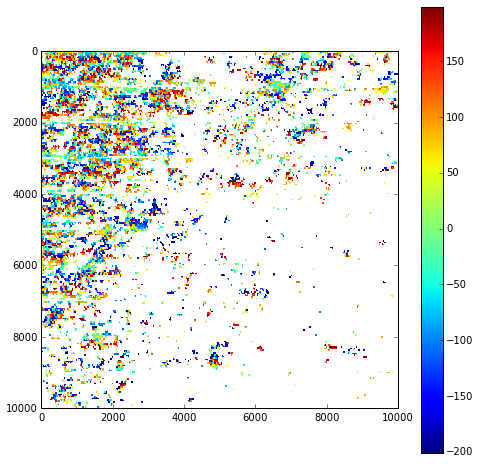

In [7]:
plt.figure(figsize=(8,8))
plt.imshow(optimalx)
plt.colorbar()

In [20]:
mask = np.isnan(x_costu)
op_u = x_costu[~mask]
op_sft = x_cost_sft[~mask]
op_cost = np.array(zip(op_u, op_sft))

(0, 0.18564935636269228)

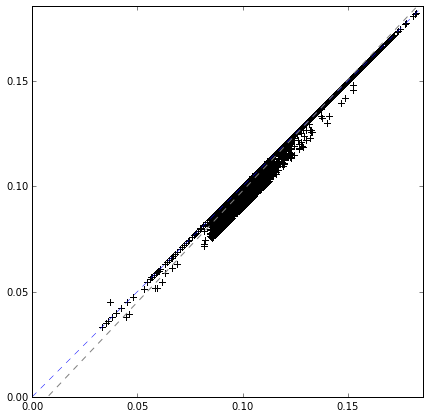

In [21]:
plt.figure(figsize = (7,7))
maxval = np.nanmax(op_cost)
r = scipy.stats.linregress(op_cost[:,1],op_cost[:,0])

fit = np.polyfit(op_cost[:,1],op_cost[:,0],1)
fit_fn = np.poly1d(fit)
#plt.figure(figsize = (7,7))
plt.plot(op_cost[:,1],op_cost[:,0], 'k+')
plt.plot([0,1],[0.,1], '--',linewidth=0.5)
plt.plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
plt.xlim(0, maxval)
plt.ylim(0, maxval)

In [3]:
optimaly = parallel_rw_pkl(None, 'optimaly', 'r')
#y_costu = parallel_rw_pkl(None, 'y_cosu', 'r')
#y_cost_sft= parallel_rw_pkl(None, 'y_cost_sft', 'r')

<matplotlib.colorbar.Colorbar instance at 0x7f8418f27320>

/home/ucfafyi/.conda/envs/my_root/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


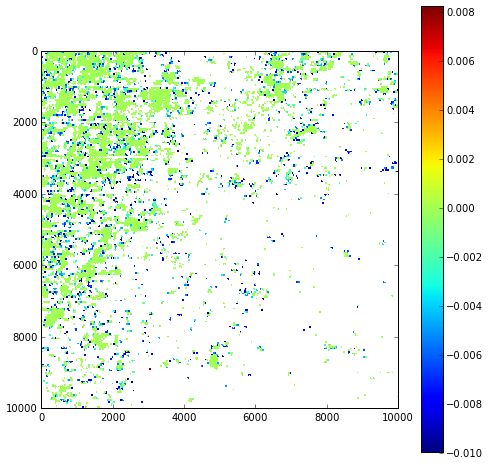

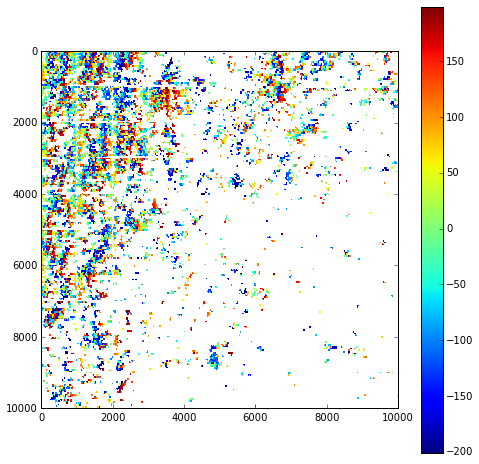

In [5]:
import pylab as plt
plt.figure(figsize=(8,8))
plt.imshow(y_costu-y_cost_sft)
plt.colorbar()

plt.figure(figsize=(8,8))
plt.imshow(optimaly)
plt.colorbar()

In [4]:
s_opx = np.square(optimalx)
s_opy = np.square(optimaly)

<matplotlib.colorbar.Colorbar instance at 0x7f65de9656c8>

/home/ucfafyi/.conda/envs/my_root/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


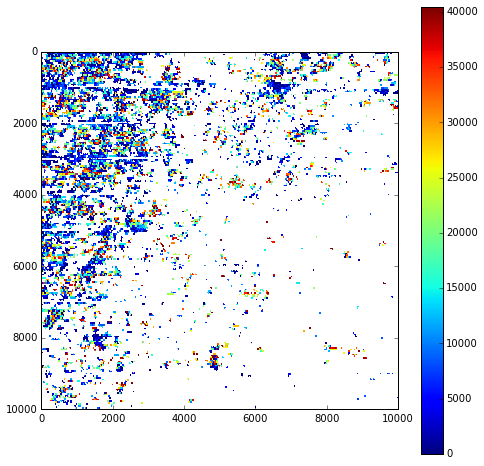

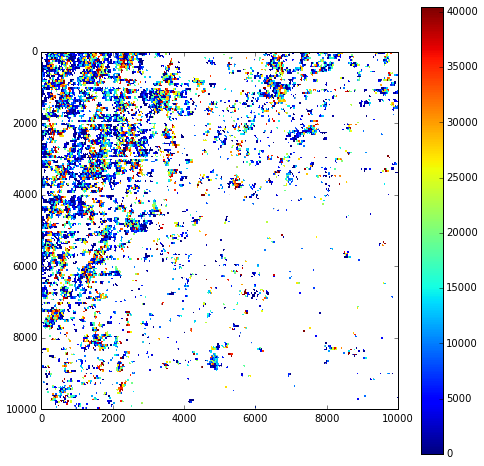

In [6]:
import pylab as plt
plt.figure(figsize= (8,8))
plt.imshow(s_opx)
plt.colorbar()

plt.figure(figsize= (8,8))
plt.imshow(s_opy)
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7f65c68c2200>

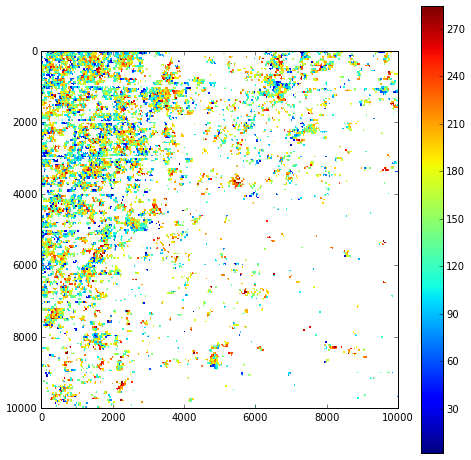

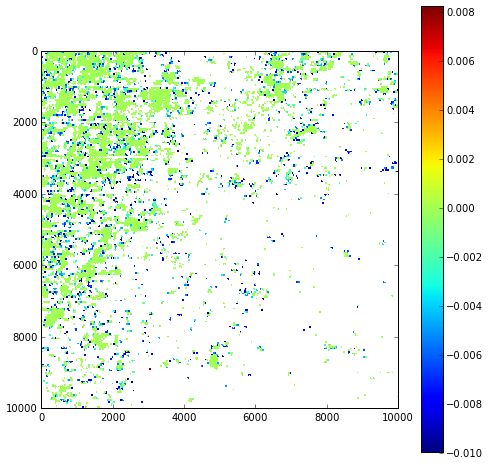

In [8]:
plt.figure(figsize= (8,8))
plt.imshow(np.sqrt(s_opy+s_opx))
plt.colorbar()

plt.figure(figsize= (8,8))
plt.imshow(x_costu-x_cost_sft)
plt.colorbar()

/data/store01/data_dirs/students/ucfafyi/.conda/envs/my_root/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app


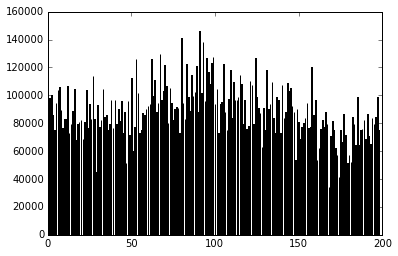

In [19]:
disx = np.sqrt(s_opx)
a,b,c = plt.hist(disx[~(np.isnan(disx)|(disx>198))], bins=500, color='k')

/data/store01/data_dirs/students/ucfafyi/.conda/envs/my_root/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app


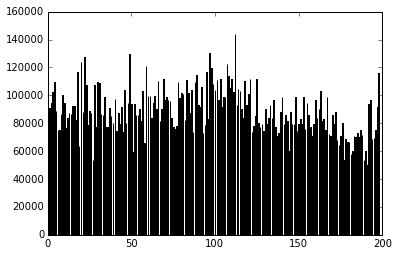

In [20]:
disy = np.sqrt(s_opy)
a,b,c = plt.hist(disy[~(np.isnan(disy)|(disy>198))], bins=500, color='k')

/data/store01/data_dirs/students/ucfafyi/.conda/envs/my_root/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app


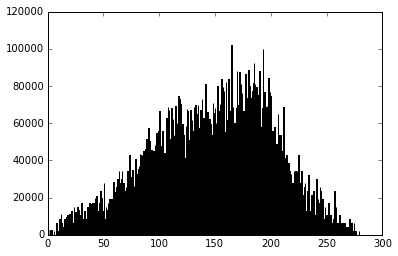

In [24]:
dis = np.sqrt(s_opy+s_opx)
mask1 = np.isnan(dis) |np.isnan(disy)|(disy>198) | np.isnan(disx)|(disx>198)
mask2 = np.isnan(dis)
a,b,c = plt.hist(dis[~mask1], bins=500, color='k')

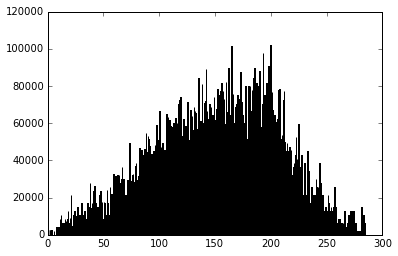

In [25]:
a,b,c = plt.hist(dis[~mask2], bins=500, color='k')

The histogram of x and y show no sign of spetial distribution, almost even, but the Ecludian distance defined by he x shift and y shift show a nearly gaussian, which basically means the distance is almost keep constant while the x and y shift is changing the angles. Therefore, an angle distribution of each patch is checked.

<matplotlib.colorbar.Colorbar instance at 0x7f65c51f8518>

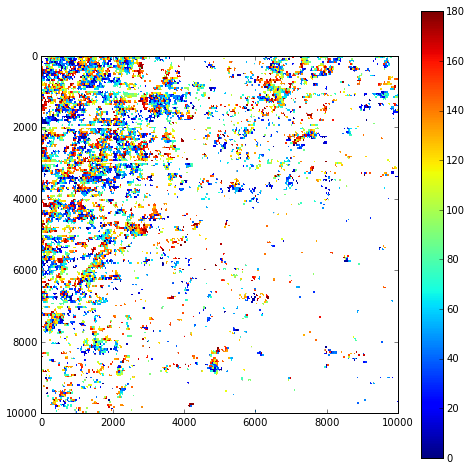

In [37]:
import math
plt.figure(figsize= (8,8))
plt.imshow(np.degrees(np.arccos(optimalx/dis)))
plt.colorbar()

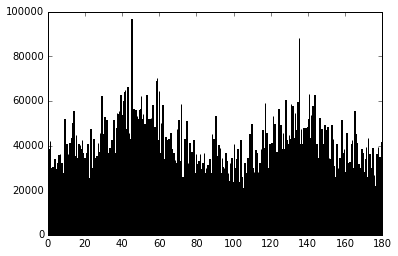

In [42]:
x_angle = np.degrees(np.arccos(optimalx/dis))
a,b,c = plt.hist(x_angle[~np.isnan(x_angle)], bins=500)

In [45]:
np.degrees(np.arcsin(-1/np.sqrt(2)))

-44.999999999999993

(-90, 90)

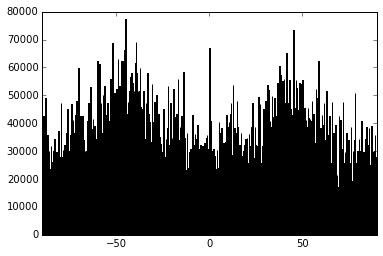

In [47]:
y_angle = np.degrees(np.arcsin(optimaly/dis))
a,b,c = plt.hist(y_angle[~np.isnan(y_angle)], bins=500)
plt.xlim(-90,90)

In [41]:
np.nanmean(np.degrees(np.arccos(optimalx/dis))), np.nanmean(np.degrees(np.arcsin(optimaly/dis)))

(88.152049217815787, -2.2950000993071855)

In [12]:
np.nanmean(np.sqrt(s_opy+s_opx)), np.nanstd(np.sqrt(s_opy+s_opx))

(151.68836496149197, 55.134412477277642)

In [48]:
d1_mask = (optimalx>0) & (optimaly>0)
d2_mask = (optimalx<0) & (optimaly>0)
d3_mask = (optimalx<0) & (optimaly<0)
d4_mask = (optimalx>0) & (optimaly<0)

/data/store01/data_dirs/students/ucfafyi/.conda/envs/my_root/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
/data/store01/data_dirs/students/ucfafyi/.conda/envs/my_root/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app
/data/store01/data_dirs/students/ucfafyi/.conda/envs/my_root/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app
/data/store01/data_dirs/students/ucfafyi/.conda/envs/my_root/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()
/data/store01/data_dirs/students/ucfafyi/.conda/envs/my_root/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in greater
/data/store01/data_dirs/students

<matplotlib.colorbar.Colorbar instance at 0x7f65c63df440>

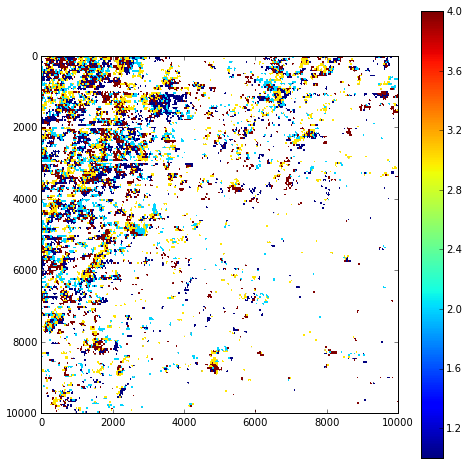

In [53]:
dmask = np.zeros((10000,10000))
dmask[:] = np.nan
dmask[d1_mask] = 1
dmask[d2_mask] = 2
dmask[d3_mask] = 3
dmask[d4_mask] = 4

plt.figure(figsize = (8,8))
plt.imshow(dmask)
plt.colorbar()

In [58]:
d1_mask.sum(),d2_mask.sum(),d3_mask.sum(),d4_mask.sum()

(4740143, 3882179, 4719832, 4689627)

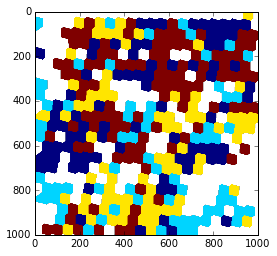

In [59]:
plt.imshow(dmask[:1000,:1000])

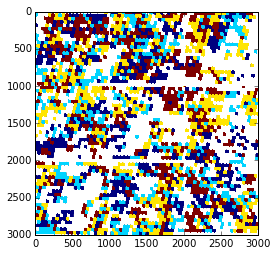

In [56]:
plt.imshow(dmask[:3000,:3000])

(0, 5)

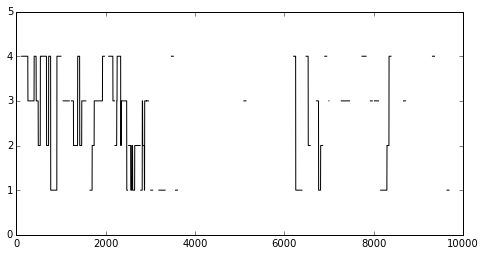

In [96]:
plt.figure(figsize=(8,4))
plt.plot(dmask[100], '-', color='k')
plt.ylim(0,5)

Too many pixels lost, basically because they have the same value. Although they are unlikely to happen in real world, it is possible to get the same results considering the spectral and temporal resolution.

In [102]:
del b4_modis
del shift

In [100]:
import numpy.ma as ma
data = parallel_rw_pkl(None, 'inter_sent%i'%2, 'r')
mask = parallel_rw_pkl(None, 'inter_sentm%i'%2, 'r')
brdf = ma.array(data, mask=mask)

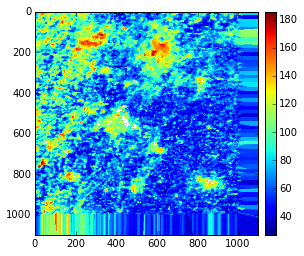

In [103]:
from dimg import *
dimg(brdf, step=10)

In [104]:
brdf=brdf[:10000,:10000]

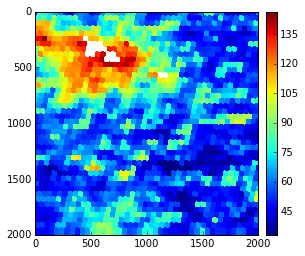

In [105]:
dimg(brdf[8000:10000,8000:10000])

Have many values similar to each other, so pixel indexes for the whole image should be built.

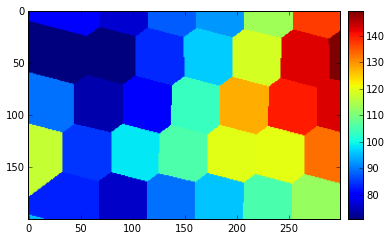

In [110]:
dimg(brdf[100:300,:300])

In [140]:
patch = brdf[100:300,:300]
vals = np.unique(patch)

<matplotlib.colorbar.Colorbar instance at 0x7f658499e638>

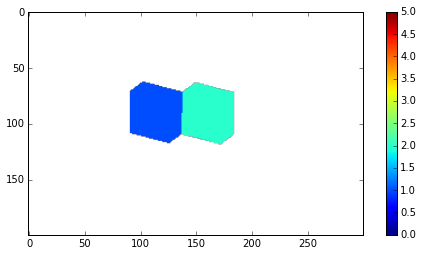

In [344]:
mask = patch.copy()
mask[:]=np.nan
mask[(patch == vals[6])] =1
mask[(patch == vals[18])] =2

#mask[indx, indy] = 1
plt.figure(figsize=(8,4))
plt.imshow(mask, vmin=0, vmax=5)
plt.colorbar()

Find out the index for the two pixels, which basically compose the while image, with different values.

In [349]:
#mask = ~np.isnan(mask)
#indxs = np.array(np.where(mask)[0])
#indys = np.array(np.where(mask)[1])
ind1x = np.where((patch == vals[6]))[0]
ind1y = np.where((patch == vals[6]))[1]
ind2x = np.where((patch == vals[18]))[0]
ind2y = np.where((patch == vals[18]))[1]
indxs = np.array(list(ind1x)+list(ind2x))
indys = np.array(list(ind1y)+list(ind2y))

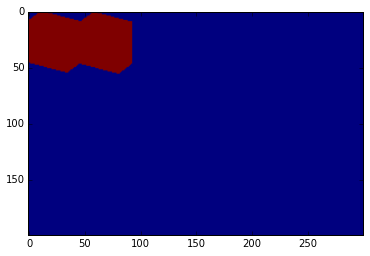

In [350]:
a = np.zeros_like(mask)
a[indxs-indxs.min(), indys-indys.min()] = 1
plt.imshow(a)

In [354]:
indx0 = indxs-indxs.min()
indy0 = indys-indys.min()

In [355]:
indx0,indy0

(array([ 0,  0,  0, ..., 55, 55, 55]), array([11, 12, 13, ..., 79, 80, 81]))

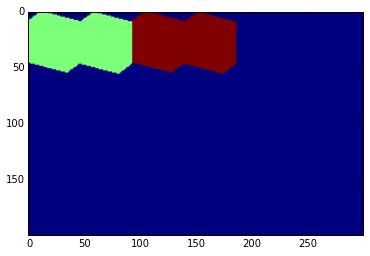

In [303]:
# horizontal each time with y gap

ygap = indy0.max() - indy0.min()+1
indx1 = indx0; indy1 = indy0+ygap
a[indx1, indy1] = 2
plt.imshow(a)

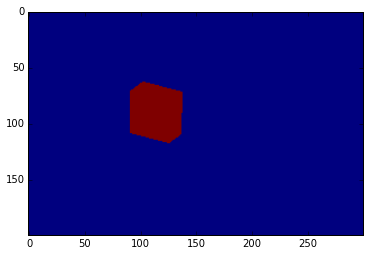

In [219]:
# the second row, both the v and h directions have shift
mask = patch.copy()
mask[:]=0
mask[(patch == vals[6])] =1
plt.imshow(mask)

In [227]:
x = np.where(mask)[0]-(np.where(mask)[0]).min()
y = np.where(mask)[1]-(np.where(mask)[1]).min()
x,y

(array([ 0,  0,  0, ..., 54, 54, 54]), array([11, 12, 13, ..., 33, 34, 35]))

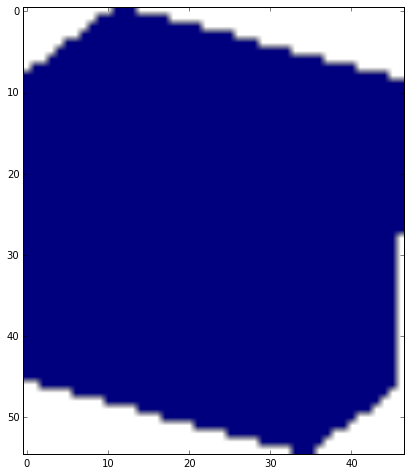

In [274]:
a = np.zeros((x.max()+1,y.max()+1))
a[:] = np.nan
a[x,y] = 1
plt.figure(figsize = (8,8))
plt.imshow(a[:,:y.max()+1], interpolation=None)

In [298]:
x[y==y.max()-1][-1], y[y==y.max()-1][0]

(46, 45)

(54, 0)

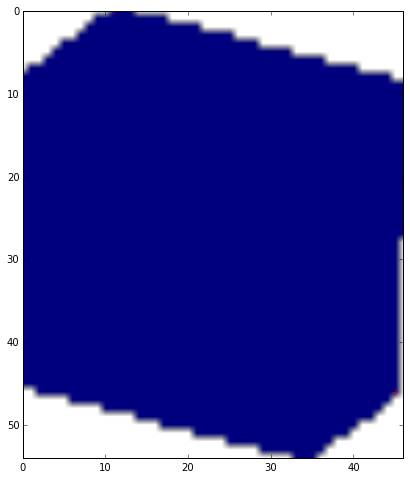

In [295]:
plt.figure(figsize = (8,8))
plt.imshow(a[:,:y.max()+1], interpolation=None)
plt.plot(y[0], x[0], 'r+')
plt.plot(45, 46, 'r+')
plt.xlim(0,y.max())
plt.ylim(x.max(),0)

In [297]:
vsft = x[y==y.max()-1][-1]-x[0]; hsft = y[y==y.max()-1][-1]-y[0]
vsft, hsft

(46, 34)

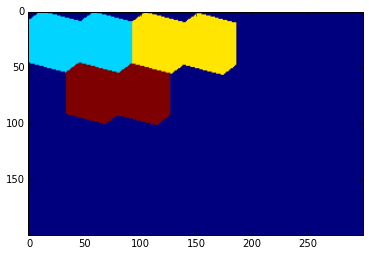

In [339]:
a = np.zeros_like(mask)
a[indxs-indxs.min(), indys-indys.min()] = 1

ygap = indy0.max() - indy0.min()
indx1 = indx0+1; indy1 = indy0+ygap+1
a[indx1, indy1] = 2

hgap = hsft
vgap = vsft
indx2 = indx0+vgap; indy2 = indy0+hgap
a[indx2, indy2] = 3
plt.imshow(a)

In [230]:
my = y == (y.max()-3)

array([False, False, False, ..., False, False, False], dtype=bool)

This problem can be solved in this way, however, we can simply generate an array with the same size of modis probudct and go through the same process, then get an array with the same shape of modis interpolated BRDF product.

In [ ]:
import sys
sys.path.insert(0,'python')
from geo_trans import *
import numpy as np
from scipy.interpolate import griddata
from fast_rw import *

def get_coords(h,v):
    mgrss = get_lon_lat(27, 5).ravel()

    mgrss = np.array([(i[:5],i[-8:-4],i[-4:]) for i in mgrss]).reshape(2400,2400,3)

    index = np.where(mgrss[:,:,0]=='50SMG')
    Scoords = [9999-mgrss[index[0], index[1],2].astype('int'), mgrss[index[0], index[1],1].astype('int')]
    return index, Scoords


h=27; v=5
Rs =  np.arange(2400*2400).reshape(2400,2400)
grid_x, grid_y = np.mgrid[0:10980, 0:10980]
index, Scoords = get_coords(h,v)

values = Rs[index[0],index[1]]
std_int_sent = griddata(np.array(zip(Scoords[0],Scoords[1])), values, (grid_x, grid_y), method='nearest')
parallel_rw_pkl(std_int_sent, 'std_int_sent%i', 'w')

In [3]:
st_m = parallel_rw_pkl(None, 'std_int_sent%i', 'r')

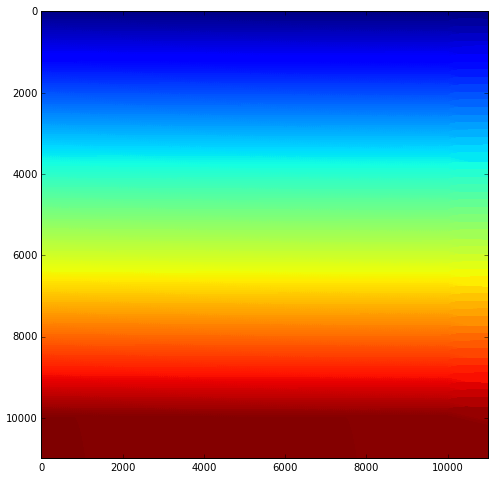

In [5]:
import pylab as plt
plt.figure(figsize=(8,8))
plt.imshow(st_m)

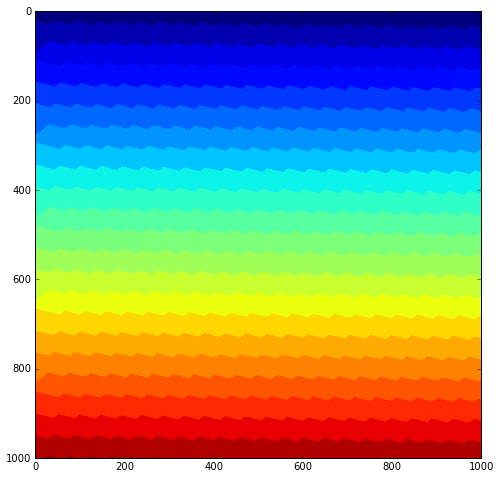

In [6]:
plt.figure(figsize=(8,8))
plt.imshow(st_m[:1000,:1000])

In [8]:
vals = np.uniqiue(st_m)

In [10]:
vals = vals-vals.min()

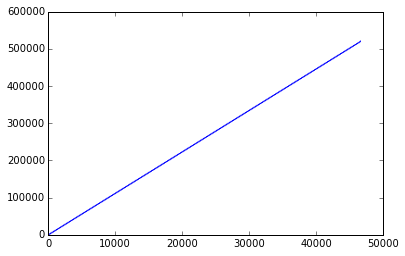

In [11]:
plt.plot(vals)

In [15]:
st_m= st_m-st_m.min()

In [16]:
parallel_rw_pkl(st_m, 'std_m', 'w')

In [19]:
stm= parallel_rw_pkl(None, 'std_m', 'r')

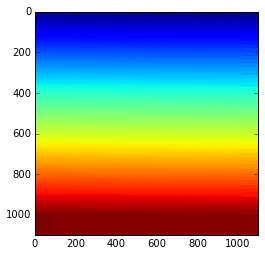

In [20]:
plt.imshow(stm[::10,::10])

In [25]:
def shift(ind, stm = None, modis_sent = None, Sent = None, star = None, end =None, mode='gaus'): 
    print ind
    struct = ndimage.generate_binary_structure(2, 2)
    mask = (stm == ind)
    if (mask.sum() >= 2000) and (mask.sum() < 3000):
        
        brdf = Counter(modis_sent[mask]).most_common(1)[0][0]
        print brdf
        indx = np.where(mask)[0]
        indy = np.where(mask)[1]
        
        xmin = np.where(mask)[0].min()
        xmax = np.where(mask)[0].max()
        ymin = np.where(mask)[1].min()
        ymax = np.where(mask)[1].max()
        
        dia_mask = bd(mask, structure=struct, iterations=200)
        Sent[~dia_mask] = 0
        
        
        
        to_conv = Sent[min(np.where(dia_mask)[0]):max(np.where(dia_mask)[0])+1,\
                       min(np.where(dia_mask)[1]):max(np.where(dia_mask)[1])+1]
        
        mask = mask[xmin:xmax, ymin:ymax]
        
        if mode == 'mean':
            
            w = 1./(np.nansum(mask))
            k = np.zeros(mask.shape).astype('float')
            k[mask] = w
            conved = signal.fftconvolve(to_conv, k, mode='valid')
            dif = abs(conved-u)
            minm = np.nanmin(dif)
            x = np.where(dif == minm)[0][0]-np.ceil((conved.shape[0])/2.)
            y = np.where(dif == minm)[1][0]-np.ceil((conved.shape[1])/2.)
            
            return [x, y , u, minm, indx,indy]

        elif mode == 'gaus':
            xwin = xmax - xmin
            ywin = ymax - ymin        
            print 'winds:',xwin,ywin            
            if (xwin <= 0) or (ywin<=0):
                pass
            else:
                cost = []
                start = 100
                if star == 0:
                    star +=0.0001
                if end == 0:
                    end +=0.0002
                for xstd in np.arange(star,end,1):
                    for ystd in np.arange(star,end,1):
                        if xstd <=ystd:
                            for angle in xrange(30,130, 2):
                                gaus = gaussian(xwin,ywin,xstd,ystd,angle, False)                            
                                gaus[~mask]=0
                                ker = gaus/(gaus.sum())
                                conved = signal.fftconvolve(to_conv, ker, mode='valid')
                                dif = abs(conved-brdf)
                                minm = np.nanmin(dif)
                                if minm<start:
                                    x = np.where(dif == minm)[0][0]-np.ceil((conved.shape[0])/2.)
                                    y = np.where(dif == minm)[1][0]-np.ceil((conved.shape[1])/2.)
                                    cost.append([xstd, ystd, angle, x, y , brdf, minm, indx, indy])
                                    start = minm
                                    print 'Find One!!', start
                        else:
                            pass
                return cost[-1]
            
        else:
            pass

    
    else:
        pass

data = parallel_rw_pkl(None, 'inter_sent%i'%2, 'r')
mask = parallel_rw_pkl(None, 'inter_sentm%i'%2, 'r')
stm= parallel_rw_pkl(None, 'std_m', 'r')

grid_z0 = ma.array(data, mask=mask)
b4 = parallel_rw_pkl(None, 'b4', 'r')

inds = np.array_split(np.unique(stm),5)
ite = inds[0]
print ite
par = partial(shift,stm = stm, modis_sent=grid_z0, Sent = b4, star=1, end=100)
pool = multiprocessing.Pool(processes=45)
data = pool.map(par, ite)
pool.close()
pool.join()
data = np.array(data, dtype=object)
parallel_rw_pkl(data, '24_06_test3', 'w')

In [13]:
import numpy.ma as ma
data = parallel_rw_pkl(None, 'inter_sent%i'%2, 'r')
mask = parallel_rw_pkl(None, 'inter_sentm%i'%2, 'r')

grid_z0 = ma.array(data, mask=mask)
b4 = parallel_rw_pkl(None, 'b4', 'r')
stm= parallel_rw_pkl(None, 'std_m', 'r')

In [ ]:
from scipy.ndimage.morphology import binary_dilation as bd
import scipy.ndimage as ndimage
from collections import Counter
Sent = b4
modis_sent = grid_z0
struct = ndimage.generate_binary_structure(2, 2)
patches = []
for i in np.unique(stm):
    mask = stm==i
    brdf = Counter(modis_sent[mask]).most_common(1)[0][0]
    xmin = np.where(mask)[0].min()
    xmax = np.where(mask)[0].max()
    ymin = np.where(mask)[1].min()
    ymax = np.where(mask)[1].max()
    indx = np.where(mask)[0]
    indy = np.where(mask)[1]
    dia_mask = bd(mask, structure=struct, iterations=200)
    Sent[~dia_mask] = 0
    to_conv = Sent[min(np.where(dia_mask)[0]):max(np.where(dia_mask)[0])+1,\
                       min(np.where(dia_mask)[1]):max(np.where(dia_mask)[1])+1]
    mask = mask[xmin:xmax, ymin:ymax]
    patches.append([mask,to_conv, brdf, indx, indy])